In [ ]:
import requests
import pandas as pd
import re

# Set your personal access token
TOKEN = ''

# Base URL for GitHub API
BASE_URL = 'https://api.github.com'

# Function to clean up company names
def clean_company(company):
    if company:
        return re.sub(r'^\s*@', '', company).strip().upper()
    return ''



In [24]:
def get_users_in_shanghai():
    users = []
    page = 1  # Initialize page here
    while True:
        response = requests.get(
            f"{BASE_URL}/search/users",
            params={'q': 'location:Shanghai followers:>200', 'page': page, 'per_page': 100},
            headers={'Authorization': f'token {TOKEN}'}
        )
        
        if response.status_code != 200:
            print(f"Error: {response.status_code} - {response.text}")
            break

        data = response.json()

        if 'items' not in data or not data['items']:
            break

        for user in data['items']:
            url=user["url"]
            response = requests.get(url,headers={'Authorization': f'token {TOKEN}'})

            # Check if the request was successful (status code 200)
            if response.status_code == 200:
                 # Parse the JSON data
                 data = response.json()
                 print(data)
                 if data['followers']>200:
                 # Display the extracted JSON data
                  user_info = {
                  'login': data['login'],
                  'name': data['name'],
                  'company': data['company'],
                  'location': data['location'],
                  'email': data['email'],
                  'hireable': data['hireable'],
                  'bio': data['bio'],
                  'public_repos': data['public_repos'],
                  'followers': data['followers'],
                  'following': data['following'],
                  'created_at': data['created_at']
                  }
                  print(user_info)
                  users.append(user_info)
            else:
                 print("NO")
        page += 1

    return users


In [32]:
def get_user_repositories(username):
    repos_data = []
    response = requests.get(f"{BASE_URL}/users/{username}/repos", headers={'Authorization': f'token {TOKEN}'})
    
    if response.status_code == 200:
        repos = response.json()
        # Sort repos by updated_at (if necessary) and limit to 500
        repos = sorted(repos, key=lambda x: x.get('updated_at', ''), reverse=True)[:500]

        for repo in repos:
            repos_info = {
                'login': username,  # Use the user's login from the user dictionary
                'full_name': repo.get('full_name', ''),
                'created_at': repo.get('created_at', ''),
                'stargazers_count': repo.get('stargazers_count', 0),
                'watchers_count': repo.get('watchers_count', 0),
                'language': repo.get('language', ''),
                'has_projects': repo.get('has_projects', False),
                'has_wiki': repo.get('has_wiki', False),
                'license_name': repo.get('license', {}).get('name', '') if repo.get('license') else ''
            }
            repos_data.append(repos_info)
    else:
        print(f"Failed to fetch repositories for {user['login']}: {response.status_code}")
    return repos_data        
    

In [33]:
if __name__ == '__main__':
    users = get_users_in_shanghai()
    
    all_repositories = []
    for user in users:
        repos = get_user_repositories(user['login'])
        all_repositories.extend(repos)

    repositories_df = pd.DataFrame(all_repositories)
    repositories_df.to_csv('repositories.csv', index=False)

    print("Data scraping complete. Files saved as users.csv and repositories.csv.")

{'login': 'peng-zhihui', 'id': 12994887, 'node_id': 'MDQ6VXNlcjEyOTk0ODg3', 'avatar_url': 'https://avatars.githubusercontent.com/u/12994887?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/peng-zhihui', 'html_url': 'https://github.com/peng-zhihui', 'followers_url': 'https://api.github.com/users/peng-zhihui/followers', 'following_url': 'https://api.github.com/users/peng-zhihui/following{/other_user}', 'gists_url': 'https://api.github.com/users/peng-zhihui/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/peng-zhihui/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/peng-zhihui/subscriptions', 'organizations_url': 'https://api.github.com/users/peng-zhihui/orgs', 'repos_url': 'https://api.github.com/users/peng-zhihui/repos', 'events_url': 'https://api.github.com/users/peng-zhihui/events{/privacy}', 'received_events_url': 'https://api.github.com/users/peng-zhihui/received_events', 'type': 'User', 'user_view_type': 'public', 'site_admin': 

In [34]:
import pandas as pd

# Load the existing repositories.csv file
df = pd.read_csv('repositories.csv', encoding='ISO-8859-1')

# Correctly replace boolean values with string representations
df['has_projects'] = df['has_projects'].replace({True: 'true', False: 'false', pd.NA: ''})  # Whether the repo has projects
df['has_wiki'] = df['has_wiki'].replace({True: 'true', False: 'false', pd.NA: ''})  # Whether the repo has a wiki

# Display the modified DataFrame


In [35]:
df = df.fillna("") 

In [36]:
df

,login,full_name,created_at,stargazers_count,watchers_count,language,has_projects,has_wiki,license_name
0,peng-zhihui,peng-zhihui/ElectronBot,2022-03-11T09:24:44Z,7959,7959,C,true,true,GNU General Public License v3.0
1,peng-zhihui,peng-zhihui/HoloCubic,2021-01-07T03:24:11Z,6065,6065,C,true,true,GNU General Public License v3.0
2,peng-zhihui,peng-zhihui/Dummy-Robot,2021-10-07T11:42:58Z,12171,12171,C,true,true,
3,peng-zhihui,peng-zhihui/HelloWord-Keyboard,2022-07-30T09:00:25Z,6087,6087,C,true,true,GNU General Public License v3.0
4,peng-zhihui,peng-zhihui/agibot_x1_hardware,2024-10-24T08:57:19Z,46,46,,true,false,
...,...,...,...,...,...,...,...,...,...
19317,EricGao888,EricGao888/airflow-prometheus-exporter,2021-08-16T04:21:08Z,0,0,,true,true,Other
19318,EricGao888,EricGao888/airflow-dashboards,2021-04-15T08:19:53Z,0,0,,true,true,Apache License 2.0
19319,EricGao888,EricGao888/EricGao888.github.io,2018-09-04T04:28:13Z,0,0,HTML,true,true,
19320,EricGao888,EricGao888/DatabasePractice,2018-12-14T15:17:32Z,0,0,JavaScript,true,true,


In [37]:
df.to_csv('repositories.csv', index=False)

In [25]:
if __name__ == '__main__':
    users = get_users_in_shanghai()
    
    # Save user data
    users_df = pd.DataFrame(users)
    users_df.to_csv('users.csv', index=False)

{'login': 'peng-zhihui', 'id': 12994887, 'node_id': 'MDQ6VXNlcjEyOTk0ODg3', 'avatar_url': 'https://avatars.githubusercontent.com/u/12994887?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/peng-zhihui', 'html_url': 'https://github.com/peng-zhihui', 'followers_url': 'https://api.github.com/users/peng-zhihui/followers', 'following_url': 'https://api.github.com/users/peng-zhihui/following{/other_user}', 'gists_url': 'https://api.github.com/users/peng-zhihui/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/peng-zhihui/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/peng-zhihui/subscriptions', 'organizations_url': 'https://api.github.com/users/peng-zhihui/orgs', 'repos_url': 'https://api.github.com/users/peng-zhihui/repos', 'events_url': 'https://api.github.com/users/peng-zhihui/events{/privacy}', 'received_events_url': 'https://api.github.com/users/peng-zhihui/received_events', 'type': 'User', 'user_view_type': 'public', 'site_admin': 

In [21]:
page = 1  # Initialize page here
response = requests.get(
            f"{BASE_URL}/search/users",
            params={'q': 'location:Shanghai followers:>200', 'page': page, 'per_page': 100},
            headers={'Authorization': f'token {TOKEN}'}
        )
        
if response.status_code != 200:
    print(f"Error: {response.status_code} - {response.text}")


data = response.json()

if 'items' not in data or not data['items']:
    print('no dat')

data['items'][0]

{'login': 'peng-zhihui',
 'id': 12994887,
 'node_id': 'MDQ6VXNlcjEyOTk0ODg3',
 'avatar_url': 'https://avatars.githubusercontent.com/u/12994887?v=4',
 'gravatar_id': '',
 'url': 'https://api.github.com/users/peng-zhihui',
 'html_url': 'https://github.com/peng-zhihui',
 'followers_url': 'https://api.github.com/users/peng-zhihui/followers',
 'following_url': 'https://api.github.com/users/peng-zhihui/following{/other_user}',
 'gists_url': 'https://api.github.com/users/peng-zhihui/gists{/gist_id}',
 'starred_url': 'https://api.github.com/users/peng-zhihui/starred{/owner}{/repo}',
 'subscriptions_url': 'https://api.github.com/users/peng-zhihui/subscriptions',
 'organizations_url': 'https://api.github.com/users/peng-zhihui/orgs',
 'repos_url': 'https://api.github.com/users/peng-zhihui/repos',
 'events_url': 'https://api.github.com/users/peng-zhihui/events{/privacy}',
 'received_events_url': 'https://api.github.com/users/peng-zhihui/received_events',
 'type': 'User',
 'user_view_type': 'public

In [4]:
response = requests.get(
    f"{BASE_URL}/search/users",
    params={'q': 'location:Shanghai followers:>200', 'page': page, 'per_page': 100},
    headers={'Authorization': f'token {TOKEN}'}
)
if response.status_code != 200:
    print(f"Error: {response.status_code} - {response.text}")
    


NameError: name 'page' is not defined

In [2]:
users

[]

In [26]:
import pandas as pd

# Load the existing users.csv file
users_df = pd.read_csv('users.csv', encoding='ISO-8859-1')

# Function to clean up company names
def clean_company_name(company):
    if pd.isna(company) or company == "":
        return ""
    else:
        return company.strip().lstrip('@').upper()

# Apply transformations
users_df['company'] = users_df['company'].apply(clean_company_name)
users_df['email'] = users_df['email'].fillna("")  # Replace NaN with empty string

# Correctly handle the hireable column
# Assume the hireable column is a boolean type, replace True with 'true', False with 'false', and NaN with ''
users_df['hireable'] = users_df['hireable'].replace({True: 'true', False: 'false', pd.NA: ''})

# Ensure no missing values in other fields
users_df['bio'] = users_df['bio'].fillna("")  # Replace NaN with empty string

# Save the modified DataFrame back to users.csv
#users_df.to_csv('users.csv', index=False)

print("users.csv has been modified successfully.")

users.csv has been modified successfully.


In [28]:
users_df

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at
0,peng-zhihui,ç¨æ,HUAWEI RESEARCH,Shanghai,prime_zhihui@foxmail.com,,éçé¢éä¾ æ¬ä¾ ã,59,80624,9,2015-06-22T04:59:39Z
1,ruanyf,Ruan YiFeng,,"Shanghai, China",yifeng.ruan@gmail.com,,,72,79307,0,2011-07-10T01:07:17Z
2,phodal,Fengda Huang,THOUGHTWORKS,"Shanghai / Hangzhou, China",h@phodal.com,true,I'm digging holes.,367,20054,9,2010-11-08T11:46:51Z
3,liyupi,ç¨åºåé±¼ç®,Ç¼Ç¨Å­¦Ä¹ Å ¬Ä¼Å·ÃÇ¨ÅºÅÉ±¼Ç®Ã,China Shanghai,592789970@qq.com,true,speak less do moreï¼åè ¾è®¯å ¨æ å¼åï¼ç...,82,17368,29,2017-02-26T08:44:22Z
4,stormzhang,stormzhang,"BOOHEE, INC.","Shanghai, China",stormzhang.dev@gmail.com,,å¾®ä¿¡å ¬ä¼å·ï¼stormzhang,5,15880,91,2012-09-03T02:58:11Z
...,...,...,...,...,...,...,...,...,...,...,...
736,rudeigerc,Yuchen Cheng,,"Shanghai, China",rudeigerc@gmail.com,,Software Engineer / ex-WizardQuant @antgroup /...,133,201,159,2016-04-03T11:26:09Z
737,nighca,Hanxing Yang,,Shanghai,nighca@live.cn,true,Engineer,99,201,56,2012-03-02T11:22:16Z
738,eleme,Eleme,,Shanghai,,,Eleme Open Source,37,201,0,2011-11-17T08:24:00Z
739,HiWong,HiWong,BYTEDANCE,Shanghai,bettarwang@163.com,,Android Developer,994,201,49,2014-12-04T01:54:59Z


In [29]:
users_df.to_csv('users.csv', index=False)


In [30]:
pd.read_csv("users.csv")

,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at
0,peng-zhihui,ç¨æ,HUAWEI RESEARCH,Shanghai,prime_zhihui@foxmail.com,NaN,éçé¢éä¾ æ¬ä¾ ã,59,80624,9,2015-06-22T04:59:39Z
1,ruanyf,Ruan YiFeng,NaN,"Shanghai, China",yifeng.ruan@gmail.com,NaN,NaN,72,79307,0,2011-07-10T01:07:17Z
2,phodal,Fengda Huang,THOUGHTWORKS,"Shanghai / Hangzhou, China",h@phodal.com,True,I'm digging holes.,367,20054,9,2010-11-08T11:46:51Z
3,liyupi,ç¨åºåé±¼ç®,Ç¼Ç¨Å­¦Ä¹ Å ¬Ä¼Å·ÃÇ¨ÅºÅÉ±¼Ç®Ã,China Shanghai,592789970@qq.com,True,speak less do moreï¼åè ¾è®¯å ¨æ å¼åï¼ç...,82,17368,29,2017-02-26T08:44:22Z
4,stormzhang,stormzhang,"BOOHEE, INC.","Shanghai, China",stormzhang.dev@gmail.com,NaN,å¾®ä¿¡å ¬ä¼å·ï¼stormzhang,5,15880,91,2012-09-03T02:58:11Z
...,...,...,...,...,...,...,...,...,...,...,...
736,rudeigerc,Yuchen Cheng,NaN,"Shanghai, China",rudeigerc@gmail.com,NaN,Software Engineer / ex-WizardQuant @antgroup /...,133,201,159,2016-04-03T11:26:09Z
737,nighca,Hanxing Yang,NaN,Shanghai,nighca@live.cn,True,Engineer,99,201,56,2012-03-02T11:22:16Z
738,eleme,Eleme,NaN,Shanghai,NaN,NaN,Eleme Open Source,37,201,0,2011-11-17T08:24:00Z
739,HiWong,HiWong,BYTEDANCE,Shanghai,bettarwang@163.com,NaN,Android Developer,994,201,49,2014-12-04T01:54:59Z


Fraction of hireable users with email: 0.744
Fraction of non-hireable users with email: 0.671
Difference: 0.073


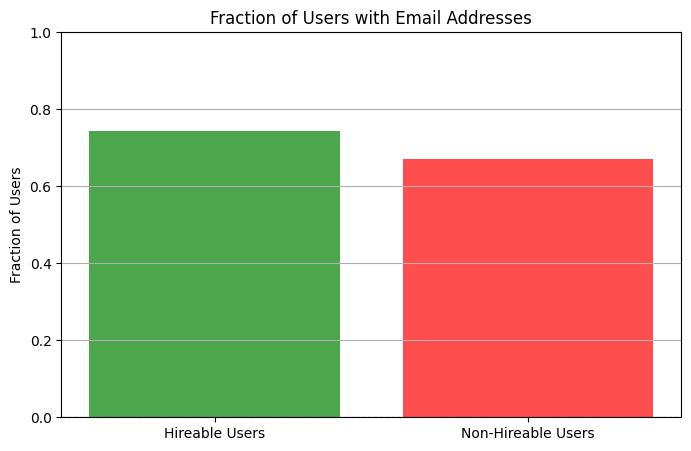

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load user data
try:
    users_df = pd.read_csv('users.csv')
except FileNotFoundError:
    print("Error: 'users.csv' file not found.")
    exit()

# Check if necessary columns exist
if 'hireable' not in users_df.columns or 'email' not in users_df.columns:
    print("Error: Required columns are missing in 'users.csv'.")
    exit()

# Calculate fraction of users with email for hireable users
hireable_users = users_df[users_df['hireable'] == True]
fraction_hireable_with_email = hireable_users['email'].notnull().mean()

# Calculate fraction of users with email for non-hireable users
non_hireable_users = users_df[users_df['hireable'] != True]
fraction_non_hireable_with_email = non_hireable_users['email'].notnull().mean()

# Calculate the difference
email_difference = fraction_hireable_with_email - fraction_non_hireable_with_email

# Print the result
print(f"Fraction of hireable users with email: {fraction_hireable_with_email:.3f}")
print(f"Fraction of non-hireable users with email: {fraction_non_hireable_with_email:.3f}")
print(f"Difference: {email_difference:.3f}")

# Visualization
labels = ['Hireable Users', 'Non-Hireable Users']
fractions = [fraction_hireable_with_email, fraction_non_hireable_with_email]

plt.figure(figsize=(8, 5))
plt.bar(labels, fractions, color=['green', 'red'], alpha=0.7)
plt.title('Fraction of Users with Email Addresses')
plt.ylabel('Fraction of Users')
plt.ylim(0, 1)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(axis='y')
plt.show()


Most common surname(s): Zhang
Number of users with the most common surname: 20


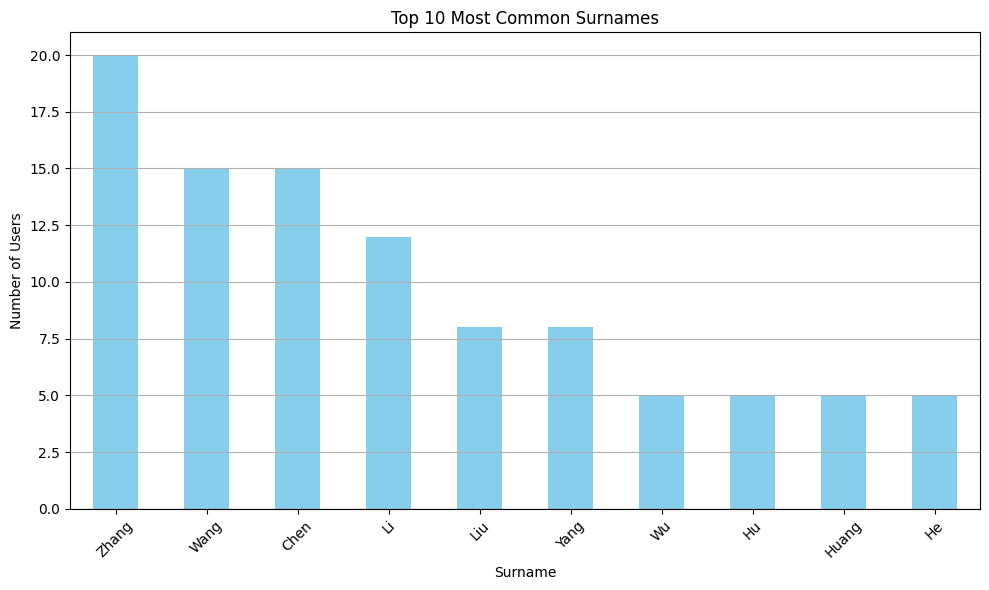

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load user data
try:
    users_df = pd.read_csv('users.csv')
except FileNotFoundError:
    print("Error: 'users.csv' file not found.")
    exit()

# Check if the 'name' column exists
if 'name' not in users_df.columns:
    print("Error: 'name' column is missing in 'users.csv'.")
    exit()

# Filter out users with missing names
users_with_names = users_df[users_df['name'].notnull()]

# Extract surnames by splitting names and taking the last word
surnames = users_with_names['name'].apply(lambda x: x.strip().split()[-1])

# Count occurrences of each surname
surname_counts = surnames.value_counts()

# Identify the most common surname(s)
most_common_surname_count = surname_counts.max()
most_common_surnames = surname_counts[surname_counts == most_common_surname_count].index.tolist()

# Print results
print("Most common surname(s):", ', '.join(sorted(most_common_surnames)))
print("Number of users with the most common surname:", most_common_surname_count)

# Visualization
plt.figure(figsize=(10, 6))
surname_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Surnames')
plt.ylabel('Number of Users')
plt.xlabel('Surname')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd

# Load the repositories.csv data
repos_df = pd.read_csv('repositories.csv')

# Filter out repositories with missing license_name
licenses = repos_df['license_name'].dropna()

# Count the occurrences of each license
license_counts = licenses.value_counts()

# Print the list of licenses and their frequencies
print("License frequencies:")
print(license_counts)

# Get the top 3 most popular licenses
top_licenses = license_counts.head(4).index.tolist()

# Join them as a comma-separated string
top_licenses_str = ', '.join(top_licenses)

# Output the top 3 licenses
print(f"\nThe 3 most popular licenses are: {top_licenses_str}")


License frequencies:
license_name
MIT License                                                   4808
Apache License 2.0                                            2552
Other                                                         1251
GNU General Public License v3.0                                634
BSD 3-Clause "New" or "Revised" License                        265
GNU General Public License v2.0                                215
Creative Commons Zero v1.0 Universal                           114
GNU Affero General Public License v3.0                          98
BSD 2-Clause "Simplified" License                               93
GNU Lesser General Public License v3.0                          55
Mozilla Public License 2.0                                      47
The Unlicense                                                   44
Do What The F*ck You Want To Public License                     38
Creative Commons Attribution 4.0 International                  36
GNU Lesser General Public Li

In [ ]:
!pip install matplotlib
!pip install scikit-learn

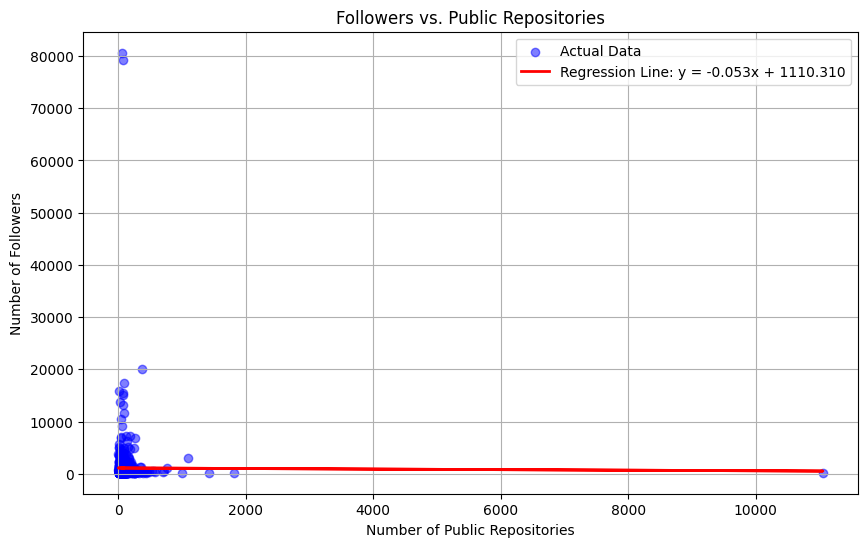

Regression slope: -0.053
Intercept: 1110.310
Mean Squared Error: 20323175.219

Estimated additional followers per additional public repository: -0.053


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def load_data(file_path):
    """Load the CSV file and handle any errors."""
    try:
        data = pd.read_csv(file_path)
        return data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: File '{file_path}' could not be parsed.")
        return None

def perform_regression(data):
    """Perform linear regression and return the slope."""
    try:
        # Ensure necessary columns exist
        if 'public_repos' not in data.columns or 'followers' not in data.columns:
            print("Error: Data does not contain the required columns 'public_repos' and 'followers'.")
            return None
        
        # Filter out any rows with missing data
        data = data.dropna(subset=['public_repos', 'followers'])

        # Prepare the data for regression
        X = data['public_repos'].values.reshape(-1, 1)  # Independent variable (public repos)
        y = data['followers'].values  # Dependent variable (followers)

        # Perform the regression
        model = LinearRegression()
        model.fit(X, y)
        
        # Predict values for the regression line
        y_pred = model.predict(X)
        
        # Calculate the regression slope
        slope = model.coef_[0]
        intercept = model.intercept_
        
        # Calculate the mean squared error
        mse = mean_squared_error(y, y_pred)
        
        # Plot the data and the regression line
        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
        plt.plot(X, y_pred, color='red', linewidth=2, label=f'Regression Line: y = {slope:.3f}x + {intercept:.3f}')
        plt.title('Followers vs. Public Repositories')
        plt.xlabel('Number of Public Repositories')
        plt.ylabel('Number of Followers')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Print results
        print(f'Regression slope: {slope:.3f}')
        print(f'Intercept: {intercept:.3f}')
        print(f'Mean Squared Error: {mse:.3f}')
        
        return slope
    except Exception as e:
        print(f"An error occurred during regression: {e}")
        return None

if __name__ == '__main__':
    # Load the user data
    users_df = load_data('users.csv')
    
    if users_df is not None:
        # Perform the regression analysis
        slope = perform_regression(users_df)
        
        if slope is not None:
            print(f"\nEstimated additional followers per additional public repository: {slope:.3f}")


Regression slope: -0.053
Intercept: 1110.310
Mean Squared Error: 20323175.219
Estimated additional followers per additional public repository: -0.053


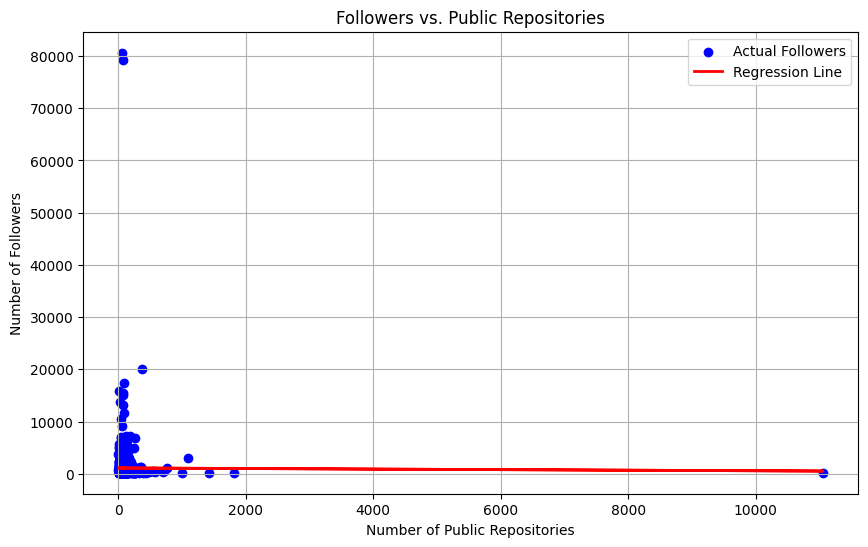

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('users.csv')

# Prepare the data for regression
X = data['public_repos'].values.reshape(-1, 1)  # Independent variable
y = data['followers'].values  # Dependent variable

# Create a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate metrics
slope = model.coef_[0]
intercept = model.intercept_
mse = mean_squared_error(y, y_pred)

# Output results
print(f"Regression slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Estimated additional followers per additional public repository: {slope:.3f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Followers')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Followers vs. Public Repositories')
plt.xlabel('Number of Public Repositories')
plt.ylabel('Number of Followers')
plt.legend()
plt.grid()
plt.show()


Regression slope: -23.400
Intercept: 1199.316
Mean Squared Error: 15770461.375
Estimated additional followers per additional word in bio: -23.400


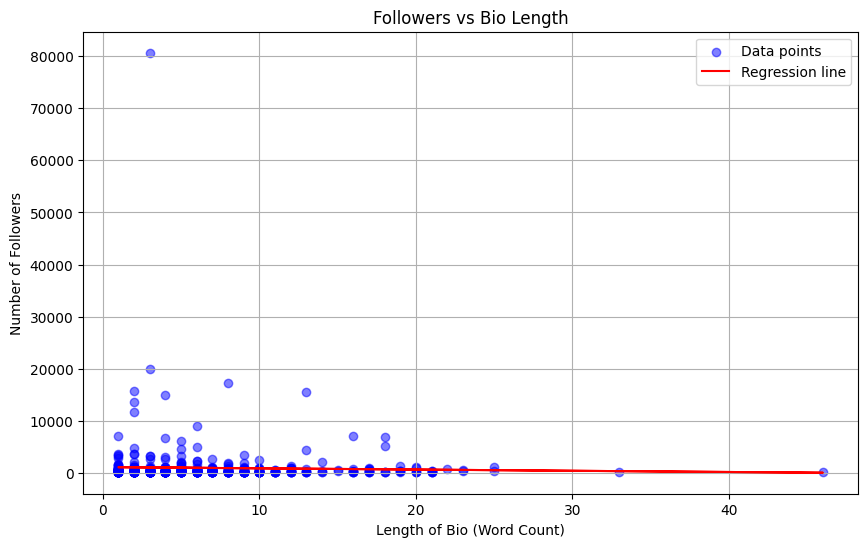

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load user data
try:
    users_df = pd.read_csv('users.csv')
except FileNotFoundError:
    print("Error: 'users.csv' file not found.")
    exit()

# Clean and prepare the data
users_df['bio'] = users_df['bio'].fillna('')  # Fill NaNs with empty string
users_df['bio_length'] = users_df['bio'].str.split().str.len()  # Count words in bio
users_df = users_df[users_df['bio_length'] > 0]  # Ignore users without bios

# Prepare features and target
X = users_df[['bio_length']]  # Independent variable
y = users_df['followers']  # Dependent variable

# Perform regression
model = LinearRegression()

try:
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
except Exception as e:
    print(f"Error during regression: {e}")
    exit()

# Print results
print(f"Regression slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

# Estimated additional followers per additional word in bio
print(f"Estimated additional followers per additional word in bio: {slope:.3f}")

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(users_df['bio_length'], users_df['followers'], color='blue', alpha=0.5, label='Data points')
plt.plot(users_df['bio_length'], y_pred, color='red', label='Regression line')
plt.title('Followers vs Bio Length')
plt.xlabel('Length of Bio (Word Count)')
plt.ylabel('Number of Followers')
plt.legend()
plt.grid()
plt.show()


Top 5 users with the most repositories created on weekends (UTC):
Doraemonzzz, ChenBohan, OysterQAQ, im0qianqian, idootop


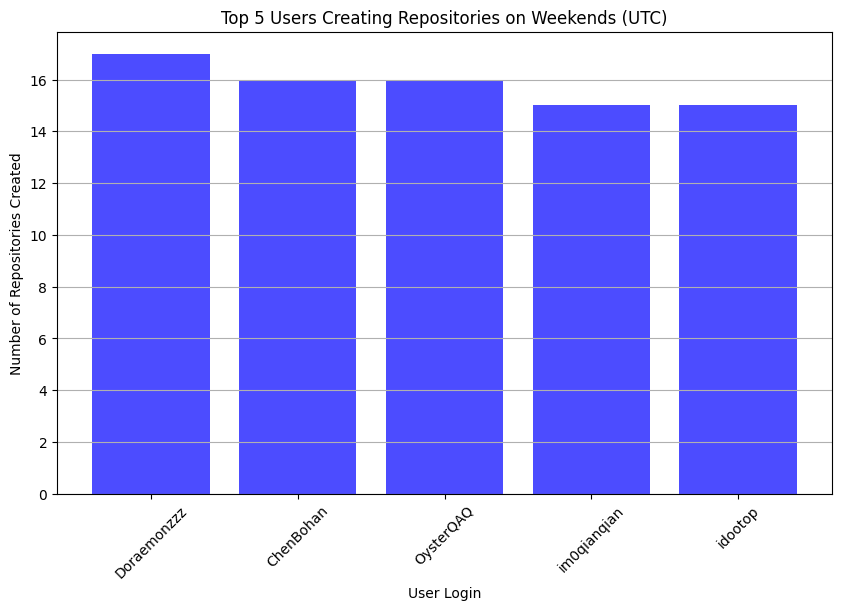

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load repository data
try:
    repos_df = pd.read_csv('repositories.csv')
except FileNotFoundError:
    print("Error: 'repositories.csv' file not found.")
    exit()

# Convert 'created_at' to datetime
repos_df['created_at'] = pd.to_datetime(repos_df['created_at'], errors='coerce')

# Filter for weekend repositories (Saturday = 5, Sunday = 6)
repos_df['is_weekend'] = repos_df['created_at'].dt.dayofweek.isin([5, 6])
weekend_repos = repos_df[repos_df['is_weekend']]

# Group by user login and count repositories
user_repo_counts = weekend_repos.groupby('login').size().reset_index(name='repo_count')

# Sort by repo_count and get the top 5 users
top_users = user_repo_counts.sort_values(by='repo_count', ascending=False).head(5)

# Print the top 5 users' logins in order
print("Top 5 users with the most repositories created on weekends (UTC):")
print(", ".join(top_users['login']))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(top_users['login'], top_users['repo_count'], color='blue', alpha=0.7)
plt.title('Top 5 Users Creating Repositories on Weekends (UTC)')
plt.xlabel('User Login')
plt.ylabel('Number of Repositories Created')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [16]:
import pandas as pd

# Read the user.csv file with a different encoding (ISO-8859-1)
df = pd.read_csv('users.csv', encoding='ISO-8859-1')

# Sort the DataFrame by the 'followers' column in descending order
sorted_df = df.sort_values(by='followers', ascending=False)

# Get the top 5 users' 'login' values
top_5_logins = sorted_df.head(5)['login'].tolist()
top_5_login = sorted_df.head(5)['followers'].tolist()
print(top_5_login)
# Create a comma-separated string of the top 5 logins
top_5_logins_str = ', '.join(top_5_logins)

# Display the result
print("Top 5 users in Shanghai with the highest number of followers:", top_5_logins_str)


[80624, 79307, 20054, 17368, 15880]
Top 5 users in Shanghai with the highest number of followers: peng-zhihui, ruanyf, phodal, liyupi, stormzhang


In [15]:
import pandas as pd

# Read the user.csv file with a suitable encoding (ISO-8859-1 as a fallback)
df = pd.read_csv('users.csv', encoding='ISO-8859-1')

# Convert 'created_at' column to datetime format for proper sorting
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Sort the DataFrame by 'created_at' in ascending order
sorted_df = df.sort_values(by='created_at', ascending=True)

# Get the top 5 earliest registered users' 'login' values
earliest_5_logins = sorted_df.head(5)['login'].tolist()

# Create a comma-separated string of the earliest 5 logins
earliest_5_logins_str = ','.join(earliest_5_logins)

# Display the result
print("The 5 earliest registered GitHub users in Shanghai:", earliest_5_logins_str)


The 5 earliest registered GitHub users in Shanghai: osteele,mrluanma,ShiningRay,rainux,why404


In [14]:
import pandas as pd

# Read the repository.csv file
df = pd.read_csv('repositories.csv', encoding='ISO-8859-1')

# Filter out rows where 'license_name' is missing or empty
df_filtered = df[df['license_name'].notna() & (df['license_name'] != '')]

# Count occurrences of each license
license_counts = df_filtered['license_name'].value_counts()

# Get the top 3 most popular licenses
top_3_licenses = license_counts.head(3).index.tolist()

# Create a comma-separated string of the top 3 licenses
top_3_licenses_str = ', '.join(top_3_licenses)

# Display the result
print("The 3 most popular licenses among these users:", top_3_licenses_str)


The 3 most popular licenses among these users: MIT License, Apache License 2.0, Other


In [13]:
import pandas as pd

# Read the user.csv file
df = pd.read_csv('users.csv', encoding='ISO-8859-1')

# Clean the 'company' column
df['company'] = df['company'].str.strip()             # Trim whitespace
df['company'] = df['company'].str.lstrip('@')         # Strip leading @ symbols
df['company'] = df['company'].str.upper()             # Convert to uppercase

# Filter out rows where 'company' is missing or empty
df_filtered = df[df['company'].notna() & (df['company'] != '')]

# Count occurrences of each cleaned company
company_counts = df_filtered['company'].value_counts()

# Get the company with the highest frequency
most_common_company = company_counts.idxmax()

# Display the result
print("The majority of these developers work at:", most_common_company)


The majority of these developers work at: BYTEDANCE


In [12]:
import pandas as pd

# Read the repository.csv file
df = pd.read_csv('repositories.csv', encoding='ISO-8859-1')

# Filter out rows where 'language' is missing or empty
df_filtered = df[df['language'].notna() & (df['language'] != '')]

# Count occurrences of each language
language_counts = df_filtered['language'].value_counts()
print(language_counts)

# Get the most popular programming language
most_popular_language = language_counts.idxmax()

# Display the result
print("The most popular programming language among these users is:", most_popular_language)


language
JavaScript       2350
Python           2208
Java             1733
C++               916
Go                868
                 ... 
API Blueprint       1
Pug                 1
Macaulay2           1
ASL                 1
Rascal              1
Name: count, Length: 128, dtype: int64
The most popular programming language among these users is: JavaScript


In [11]:
import pandas as pd

# Read the users.csv and repositories.csv files
users_df = pd.read_csv('users.csv', encoding='ISO-8859-1')
repositories_df = pd.read_csv('repositories.csv', encoding='ISO-8859-1')

# Convert the created_at column to datetime
users_df['created_at'] = pd.to_datetime(users_df['created_at'], errors='coerce')

# Filter for users who joined after 2020
recent_users = users_df

# Filter repositories for these users
repositories_filtered = repositories_df[repositories_df['login'].isin(recent_users['login'])]

# Filter out rows where 'language' is missing or empty
repositories_filtered = repositories_filtered[repositories_filtered['language'].notna() & (repositories_filtered['language'] != '')]

# Count occurrences of each language
language_counts = repositories_filtered['language'].value_counts()

# Get the most popular programming language
most_popular_language = language_counts.idxmax() if not language_counts.empty else None

# Display the results
print("The most popular programming language among users who joined after 2020 is:", most_popular_language)

# Display the frequency of all languages
print("\nLanguage Frequencies:\n", language_counts)


The most popular programming language among users who joined after 2020 is: JavaScript

Language Frequencies:
 language
JavaScript       2350
Python           2208
Java             1733
C++               916
Go                868
                 ... 
API Blueprint       1
Pug                 1
Macaulay2           1
ASL                 1
Rascal              1
Name: count, Length: 128, dtype: int64


In [10]:
import pandas as pd

# Read the user and repository CSV files
users_df = pd.read_csv('users.csv', encoding='ISO-8859-1')
repos_df = pd.read_csv('repositories.csv', encoding='ISO-8859-1')

# Convert the 'created_at' column to datetime in the user DataFrame
users_df['created_at'] = pd.to_datetime(users_df['created_at'], errors='coerce')

# Filter users who joined after 2020
filtered_users = users_df[users_df['created_at'] > '2020-01-01']

# Merge the filtered users with the repositories on user login
merged_df = pd.merge(filtered_users, repos_df, left_on='login', right_on='login', how='inner')

# Count occurrences of each programming language in the repositories of filtered users
language_counts = merged_df['language'].value_counts()

# Get the second most popular programming language
second_most_popular_language = language_counts.index[1] if len(language_counts) > 1 else None

# Display the result
print("The second most popular programming language among users who joined after 2020 is:", second_most_popular_language)


The second most popular programming language among users who joined after 2020 is: HTML


In [9]:
import pandas as pd

# Read the users.csv and repositories.csv files
users_df = pd.read_csv('users.csv', encoding='ISO-8859-1')
repositories_df = pd.read_csv('repositories.csv', encoding='ISO-8859-1')

# Convert the created_at column to datetime
users_df['created_at'] = pd.to_datetime(users_df['created_at'])

# Filter for users who joined after 2020
recent_users = users_df[users_df['created_at'] > '2020-01-01']

# Debug: Check number of recent users
print("Number of users who joined after 2020:", recent_users.shape[0])

# Filter out rows where 'language' is missing or empty
repositories_filtered = repositories_df[repositories_df['login'].isin(recent_users['login'])]
# Debug: Check number of repositories for recent users
print("Number of repositories for users who joined after 2020:", repositories_filtered.shape[0])

repositories_filtered = repositories_filtered[repositories_filtered['language'].notna() & (repositories_filtered['language'] != '')]

# Debug: Check how many languages are present
print("Number of languages present in the filtered repositories:", repositories_filtered['language'].nunique())

# Count occurrences of each language
language_counts = repositories_filtered['language'].value_counts()

# Get the most popular and second most popular programming languages
if len(language_counts) > 1:
    most_popular_language = language_counts.idxmax()
    second_most_popular_language = language_counts.index[1]
else:
    most_popular_language = language_counts.idxmax() if not language_counts.empty else None
    second_most_popular_language = None

# Display the results
print("The most popular programming language among these users is:", most_popular_language)
print("The second most popular programming language among these users is:", second_most_popular_language)

# Display the frequency of all languages
print("\nLanguage Frequencies:\n", language_counts)


Number of users who joined after 2020: 17
Number of repositories for users who joined after 2020: 391
Number of languages present in the filtered repositories: 26
The most popular programming language among these users is: Python
The second most popular programming language among these users is: HTML

Language Frequencies:
 language
Python              96
HTML                23
JavaScript          19
C++                 19
Dart                19
Go                  16
TypeScript          11
Java                10
Jupyter Notebook     9
C#                   8
Shell                5
Vue                  5
CSS                  4
PHP                  4
TeX                  4
MATLAB               3
Typst                2
Astro                2
Rust                 2
Cuda                 2
C                    2
Dockerfile           2
MDX                  1
Solidity             1
PostScript           1
Makefile             1
Name: count, dtype: int64


In [8]:
import pandas as pd

# Read the repositories CSV file
repos_df = pd.read_csv('repositories.csv', encoding='ISO-8859-1')

# Group by language and calculate the average number of stars per repository
average_stars = repos_df.groupby('language')['stargazers_count'].mean().reset_index()

# Find the language with the highest average stars
highest_avg_stars_language = average_stars.loc[average_stars['stargazers_count'].idxmax()]

# Display the result
print(f"The language with the highest average number of stars per repository is: {highest_avg_stars_language['language']} with an average of {highest_avg_stars_language['stargazers_count']:.2f} stars.")


The language with the highest average number of stars per repository is: Less with an average of 1360.00 stars.


In [7]:
import pandas as pd

# Read the users CSV file
users_df = pd.read_csv('users.csv', encoding='ISO-8859-1')

# Calculate leader_strength
users_df['leader_strength'] = users_df['followers'] / (1 + users_df['following'])

# Sort the DataFrame by leader_strength in descending order and select the top 5
top_leaders = users_df.nlargest(5, 'leader_strength')

# Get the logins of the top 5 users
top_leaders_logins = top_leaders['login'].tolist()

# Output the result as a comma-separated string
print("Top 5 users in terms of leader_strength:", ",".join(top_leaders_logins))


Top 5 users in terms of leader_strength: ruanyf,peng-zhihui,espressif,vnpy,bilibili


In [6]:
import pandas as pd

# Read the users CSV file
users_df = pd.read_csv('users.csv', encoding='ISO-8859-1')

# Filter users from Shanghai
shanghai_users = users_df[users_df['location'].str.contains('Shanghai', na=False)]

# Calculate the correlation between followers and public repositories
correlation = shanghai_users['followers'].corr(shanghai_users['public_repos'])

# Output the correlation value rounded to 3 decimal places
print(f"Correlation between followers and public repositories: {correlation:.3f}")


Correlation between followers and public repositories: -0.005


In [5]:
import pandas as pd

# Read the users CSV file
users_df = pd.read_csv('users.csv', encoding='ISO-8859-1')

# Filter users from Shanghai
shanghai_users = users_df[users_df['location'].str.contains('Shanghai', na=False)]

# Prepare the data
X = shanghai_users['public_repos']
y = shanghai_users['followers']

# Calculate means
mean_X = X.mean()
mean_y = y.mean()

# Calculate the numerator and denominator for the slope
numerator = sum((X - mean_X) * (y - mean_y))
denominator = sum((X - mean_X) ** 2)

# Calculate the slope
slope = numerator / denominator

# Output the slope rounded to 3 decimal places
print(f"Regression slope of followers on repos: {slope:.3f}")


Regression slope of followers on repos: -0.050


In [4]:
import pandas as pd

# Load the users CSV file
users_df = pd.read_csv('users.csv')

# Extract surnames, ignoring missing names
users_df['surname'] = users_df['name'].dropna().apply(lambda x: x.strip().split()[-1])

# Count occurrences of each surname
surname_counts = users_df['surname'].value_counts()

# Identify the most common surname(s)
most_common_count = surname_counts.max()
most_common_surnames = surname_counts[surname_counts == most_common_count].index.tolist()

# Output the result
print(f"Most common surname(s): {', '.join(most_common_surnames)}")
print(f"Number of users with the most common surname: {most_common_count}")


Most common surname(s): Zhang
Number of users with the most common surname: 20


In [2]:
import pandas as pd

# Load the users CSV file
users_df = pd.read_csv('users.csv')

# Calculate the fraction of hireable users with an email address
hireable_with_email = users_df[users_df['hireable'] == True]['email'].notna().sum()
total_hireable = users_df['hireable'].sum()
fraction_hireable = hireable_with_email / total_hireable if total_hireable > 0 else 0

# Calculate the fraction of non-hireable users with an email address
non_hireable_with_email = users_df[users_df['hireable'] == False]['email'].notna().sum()
total_non_hireable = len(users_df) - total_hireable
fraction_non_hireable = non_hireable_with_email / total_non_hireable if total_non_hireable > 0 else 0

# Calculate the difference
email_difference = round(fraction_hireable - fraction_non_hireable, 3)

print(email_difference)


0.744


In [3]:
print("Hireable Users with Email:", hireable_with_email)
print("Total Hireable Users:", total_hireable)
print("Non-Hireable Users with Email:", non_hireable_with_email)
print("Total Non-Hireable Users:", total_non_hireable)


Hireable Users with Email: 160
Total Hireable Users: 215
Non-Hireable Users with Email: 0
Total Non-Hireable Users: 526


In [1]:
import pandas as pd

# Load the repositories CSV file
repos_df = pd.read_csv('repositories.csv')

# Convert the created_at column to datetime format
repos_df['created_at'] = pd.to_datetime(repos_df['created_at'])

# Filter for weekend entries (Saturday: 5, Sunday: 6)
weekend_repos = repos_df[repos_df['created_at'].dt.dayofweek.isin([5, 6])]

# Count the number of repositories created by each user
user_counts = weekend_repos['login'].value_counts()

# Get the top 5 users
top_users = user_counts.head(5).index.tolist()

# Join the user logins into a comma-separated string
result = ','.join(top_users)
print(result)


Doraemonzzz,ChenBohan,OysterQAQ,im0qianqian,xdd666t
